---

# 🌟 **A/B Hypothesis Testing** 🌟

---

## **🎯 Objective**
Conduct A/B hypothesis testing to evaluate differences in **risk** and **margin** across various features and demographic groups. Specifically, we aim to:

1. **Test for risk differences** across **provinces** and **zip codes**.
2. **Test for margin differences** across **zip codes**.
3. **Test for risk differences** between **women** and **men**.

---

## **📊 Null Hypotheses**

1. **Provinces**: There are **no risk differences** across provinces.  
2. **Zip Codes**: There are **no risk differences** between zip codes.  
3. **Margin**: There are **no significant margin differences** between zip codes.  
4. **Gender**: There are **no significant risk differences** between women and men.  

---

## **🛠️ Approach**

### **1️⃣ Select Metrics**

The following **Key Performance Indicators (KPIs)** were selected to measure the impact of the features being tested:

- **Risk Differences**: Percentage of high-risk claims in the group.  
- **Margin Differences**: Profit margin for each segment.  

---

### **2️⃣ Data Segmentation**

We segmented the data into **control** and **test** groups:

- **Group A (Control Group):** Plans **without the feature** (e.g., older plans).  
- **Group B (Test Group):** Plans **with the feature** (e.g., new plans).  

**Segmentation ensures no significant differences** between groups in key attributes such as:  
- **Client demographics** (e.g., age, gender).  
- **Auto property attributes**.  
- **Insurance plan type**.  

---

### **3️⃣ Statistical Testing**

#### **Tests Conducted**  
1. **Categorical Data**:  
   - **Chi-squared Test** (e.g., risk differences by gender, provinces, zip codes).  
2. **Numerical Data**:  
   - **t-test** (e.g., margin differences between zip codes).  

---

#### **🎯 Decision Rules**
- **Significance Level (α)**: **0.05**  
- **Interpretation**:  
  - If **p-value < 0.05**: **Reject the null hypothesis** (statistically significant difference).  
  - If **p-value ≥ 0.05**: **Fail to reject the null hypothesis** (no significant difference).  

---

## **✅ Summary of Steps**
1. Define KPIs to evaluate risk and margin differences.  
2. Segment data into control and test groups.  
3. Apply appropriate statistical tests based on data type.  
4. Interpret results using the significance level **α = 0.05**.

---


<h1 style="color: #ffffcc;">Import Modules</h1>


In [2]:
import pandas as pd
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, ttest_ind

In [3]:
notebook_dir = os.getcwd()
sys.path.append(os.path.abspath(os.path.join(notebook_dir, '..')))
sys.path.append(os.path.abspath('../scripts'))

<h1 style="color: #ffffcc;">Data loading</h1>


In [4]:
# Import the module
from scripts.Data_loader import load_and_save_txt

# Specify the file paths
txt_file_path = r"C:\Users\fikad\Desktop\10acedamy\CarInsurance-Data-Analysis\Data\MachineLearningRating_v3.txt"
csv_save_path = r"C:\Users\fikad\Desktop\10acedamy\CarInsurance-Data-Analysis\Data\MachineLearningRating_v3.csv"

# Load and save the data
Mach_lear = load_and_save_txt(txt_file_path, csv_save_path, delimiter="|")


# Display the first few rows
print(Mach_lear.head())

c:\Users\fikad\Desktop\10acedamy\INSURANCE_ANALYSIS_\scripts\Data_loader.py:22: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter=delimiter)


File saved successfully to C:\Users\fikad\Desktop\10acedamy\CarInsurance-Data-Analysis\Data\MachineLearningRating_v3.csv
   UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
0               145249     12827  2015-03-01 00:00:00             True   
1               145249     12827  2015-05-01 00:00:00             True   
2               145249     12827  2015-07-01 00:00:00             True   
3               145255     12827  2015-05-01 00:00:00             True   
4               145255     12827  2015-07-01 00:00:00             True   

  Citizenship          LegalType Title Language                 Bank  \
0              Close Corporation    Mr  English  First National Bank   
1              Close Corporation    Mr  English  First National Bank   
2              Close Corporation    Mr  English  First National Bank   
3              Close Corporation    Mr  English  First National Bank   
4              Close Corporation    Mr  English  First National Bank   

 

In [5]:
Mach_lear.columns

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium',
       'TotalClaims'],
      dtype='object')

# **Key Performance Indicators (KPIs)**

KPIs are metrics used to measure and evaluate the performance of specific aspects of the dataset. The KPIs defined in the analysis are:

---

## **1. Risk Differences**

### **Definition**  
Measures the proportion of policies classified as **high risk**. A policy is considered high risk if:  
\[
\text{HighRisk} = \text{True if } \text{TotalClaims} > 0.7 \times \text{TotalPremium}
\]

### **Purpose**  
- Identify regions or demographic groups with higher risk.  
- Support risk management, pricing strategies, and fraud detection.  

### **Statistical Test**  
- **Chi-squared Test**: Evaluates differences in high-risk policy distributions across groups (e.g., provinces, postal codes, gender).

---

## **2. Margin Differences**

### **Definition**  
Measures the **profit margin** for policies, calculated as:  
\[
\text{Margin} = \text{TotalPremium} - \text{TotalClaims}
\]

### **Purpose**  
- Assess profitability across groups (e.g., postal codes).  
- Identify underperforming regions to adjust pricing or policy strategies.

### **Statistical Test**  
- **t-test**: Compares mean margins between two groups.

---

## **Why These KPIs Matter**

- **Risk Differences**:
  - Pinpoint high-risk groups for better underwriting and resource allocation.
  - Inform targeted risk mitigation strategies.

- **Margin Differences**:
  - Identify regions with low profitability for potential premium adjustments or policy changes.
  - Optimize business performance by balancing risk and profitability.

---

## **Example Scenarios**
- **Risk Differences by Gender**: If men have a significantly higher proportion of high-risk policies than women, targeted education or policy adjustments can be implemented.  
- **Margin Differences by Postal Code**: If certain regions consistently show low margins, further investigation into claim rates, fraud, or pricing adequacy can guide strategy.

---

### **Summary**
These KPIs help the business:
1. **Manage Risk**: Identify and address high-risk groups effectively.  
2. **Improve Profitability**: Recognize and optimize underperforming regions.  
3. **Make Data-Driven Decisions**: Enhance operations and customer experience through informed insights.

In [6]:



# Add Derived Columns
# Define High Risk (e.g., if TotalClaims > 70% of TotalPremium)
Mach_lear['HighRisk'] = Mach_lear['TotalClaims'] > (0.7 * Mach_lear['TotalPremium'])

# Calculate Margin
Mach_lear['Margin'] = Mach_lear['TotalPremium'] - Mach_lear['TotalClaims']

# A/B Hypothesis Testing Function
def ab_hypothesis_testing(Mach_lear):
    results = {}

    # Null Hypothesis 1: No risk differences across provinces
    province_risk_table = pd.crosstab(Mach_lear['Province'], Mach_lear['HighRisk'])
    chi2, p_value, _, _ = chi2_contingency(province_risk_table)
    results['Province Risk Difference'] = 'Reject' if p_value < 0.05 else 'Fail to Reject'

    # Null Hypothesis 2: No risk differences between postal codes
    postal_risk_table = pd.crosstab(Mach_lear['PostalCode'], Mach_lear['HighRisk'])
    chi2, p_value, _, _ = chi2_contingency(postal_risk_table)
    results['Postal Code Risk Difference'] = 'Reject' if p_value < 0.05 else 'Fail to Reject'

    # Null Hypothesis 3: No margin differences between postal codes
    postal_groups = Mach_lear.groupby('PostalCode')['Margin']
    postal_codes = Mach_lear['PostalCode'].unique()
    if len(postal_codes) >= 2:
        group_a_margins = postal_groups.get_group(postal_codes[0])
        group_b_margins = postal_groups.get_group(postal_codes[1])
        t_stat, p_value = ttest_ind(group_a_margins, group_b_margins, equal_var=False)
        results['Postal Code Margin Difference'] = 'Reject' if p_value < 0.05 else 'Fail to Reject'
    else:
        results['Postal Code Margin Difference'] = 'Insufficient Postal Codes for Comparison'

    # Null Hypothesis 4: No risk differences between Women and Men
    gender_risk_table = pd.crosstab(Mach_lear['Gender'], Mach_lear['HighRisk'])
    chi2, p_value, _, _ = chi2_contingency(gender_risk_table)
    results['Gender Risk Difference'] = 'Reject' if p_value < 0.05 else 'Fail to Reject'

    return results

# Run Hypothesis Testing
results = ab_hypothesis_testing(Mach_lear)
for hypothesis, result in results.items():
    print(f"{hypothesis}: {result}")


Province Risk Difference: Reject
Postal Code Risk Difference: Reject
Postal Code Margin Difference: Fail to Reject
Gender Risk Difference: Reject


The bar graph illustrates the distribution of risk, likely categorized as "Low Risk" and "High Risk," across different genders. The "Not Specified" gender category has the highest number of cases, followed by males and then females. Within each category, the majority of cases fall under the "Low Risk" category. The data suggests potential biases due to the large number of cases with unspecified gender.

The bar graph illustrates the distribution of risk, likely categorized as "Low Risk" and "High Risk," across different provinces in South Africa. Gauteng and KwaZulu-Natal have the highest number of cases, with a majority falling under the "Low Risk" category. The remaining provinces have lower counts and also show a higher proportion of "Low Risk" cases.

The scatter plot visualizes the relationship between "Margin" (likely profit or loss) and different Postal Codes. Each data point represents a margin value associated with a specific postal code. The plot shows a wide range of margin values, with some postal codes exhibiting high profits while others show losses. A few outliers with extreme margin values are also visible. This graph can be used to analyze regional profitability and inform business decisions.

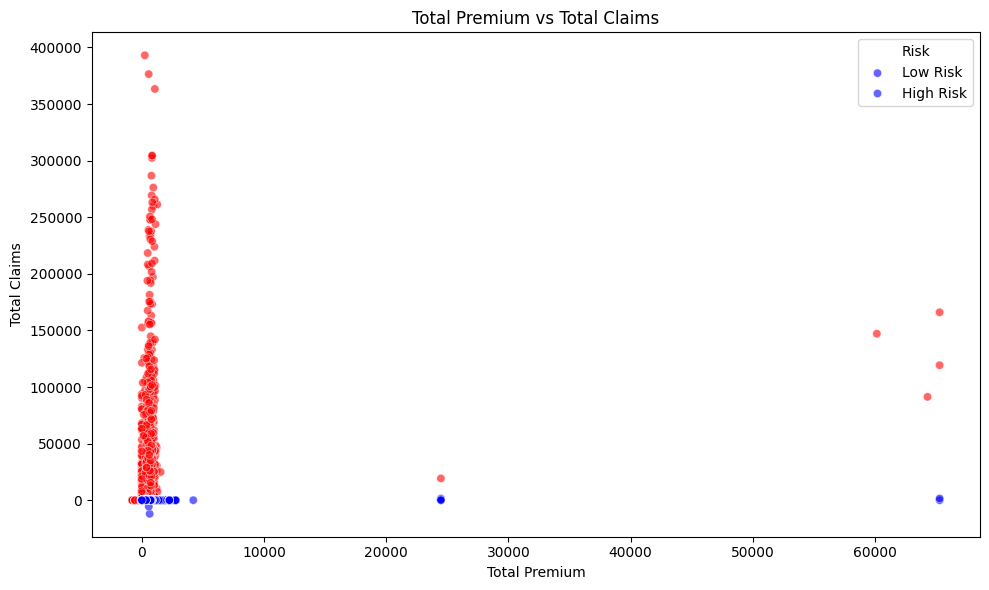

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot: Scatter Plot of Claims vs Premium
plt.figure(figsize=(10, 6))

# Scatter plot with hue based on HighRisk, using specific colors for low and high risk
sns.scatterplot(data=Mach_lear, x='TotalPremium', y='TotalClaims', hue='HighRisk', palette={0: 'blue', 1: 'red'}, alpha=0.6)

# Adding the title and labels
plt.title('Total Premium vs Total Claims')
plt.xlabel('Total Premium')
plt.ylabel('Total Claims')

# Customizing the legend
plt.legend(title='Risk', labels=['Low Risk', 'High Risk'], loc='upper right')

# Tighten layout to fit the labels
plt.tight_layout()

# Show the plot
plt.show()


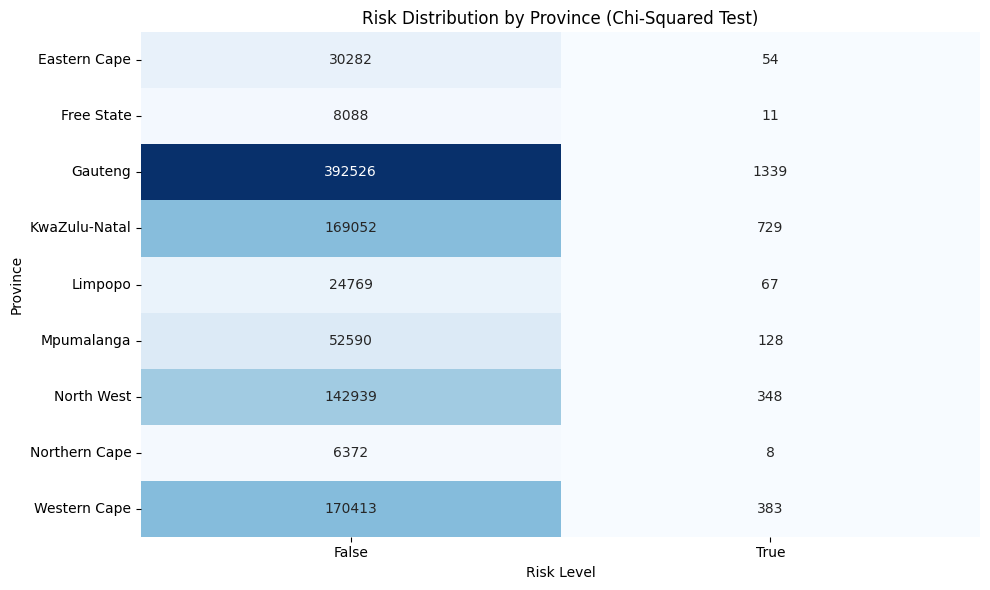

In [8]:
# Create Contingency Table for Province Risk
province_risk_table = pd.crosstab(Mach_lear['Province'], Mach_lear['HighRisk'])
# Plot: Heatmap of Province Risk
plt.figure(figsize=(10, 6))
sns.heatmap(province_risk_table, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Risk Distribution by Province (Chi-Squared Test)')
plt.xlabel('Risk Level')
plt.ylabel('Province')
plt.tight_layout()
plt.show()

The figure shows the distribution of risk levels across different provinces in South Africa.

Gauteng and Western Cape have the highest proportion of observations in the "True" risk category.
Other provinces generally show a lower proportion of "True" risk cases.

# **Results Summary**

### **1. Province Risk Difference**: **Reject**  
- Risk levels vary significantly across provinces, requiring tailored risk management and pricing strategies.

### **2. Postal Code Risk Difference**: **Reject**  
- Significant differences in risk exist between postal codes, indicating location-specific risk factors.

### **3. Postal Code Margin Difference**: **Fail to Reject**  
- No significant difference in margins across postal codes, suggesting consistent profitability.

### **4. Gender Risk Difference**: **Reject**  
- Significant risk differences exist between men and women, warranting adjustments in underwriting or targeted interventions.

### **Conclusion**  
Risk levels vary by province, postal code, and gender, while margins remain consistent across postal codes. These findings support data-driven decisions in pricing and risk management.